# Pickling And Scaling

In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import quandl
import math
import datetime
import pickle
import mpld3
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection

df = quandl.get('WIKI/GOOGL')


In [2]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume',]]

df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100.0

df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]

forecast_col='Adj. Close'

# In machine learning we can't work with not a number values.
# Replacing not a number values with -99999
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)

"""
X_lately are the values that we don't have y values for them.
We should predict the y values for them.
"""
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])



print(X.shape)
print(X_lately.shape)
print(y.shape)


(3389, 4)
(35, 4)
(3389,)


In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
# clf = LinearRegression()
# clf.fit(X_train, y_train)
"""
Classifying takes a lot of time and use lots of resources. We save
the classified data file to prevent reusing the resources
This code makes a LinearRegression.pickle file in the directory our source code.
"""
# with open('data\LinearRegression.pickle', 'wb') as f:
#   pickle.dump(clf, f)

# pickle_in = open('data\LinearRegression.pickle', 'rb')
# clf = pickle.load(pickle_in)

# acc = clf.score(X_test, y_test)

'\nClassifying takes a lot of time and use lots of resources. We save\nthe classified data file to prevent reusing the resources\nThis code makes a LinearRegression.pickle file in the directory our source code.\n'

In [4]:
"""
Now we saved Classified data file in last cell. We can open it and we don't need
to reclassify it.
"""
pickle_in = open('data\LinearRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

acc = clf.score(X_test, y_test)

In [5]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name

"""timestamp converts the unit of the time to second unit."""
last_unix = last_date.timestamp()

"""One day is 24 * 3600 = 86400 second."""
one_day = 86400

next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  """
  df.loc access a group of rows and columns by label(s) or a boolean array.
  Here we use it to add some new rows.
  [np.nan for _ in range(len(df.columns) - 1)] is for filling all coloumns
  of new row with nan values except the last one(df['Forecast'])
  """
  df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]


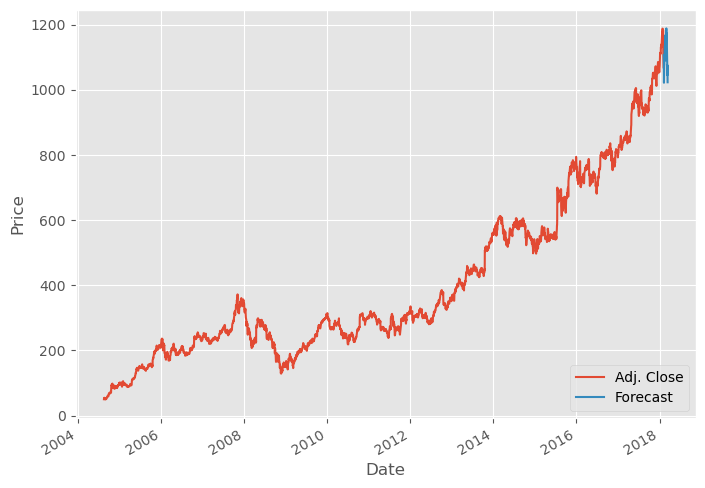

In [6]:
style.use('ggplot')

"""mpld3 activates zoom option in matplotlib."""
mpld3.enable_notebook()

plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()